# K-Means: Choosing K with Elbow and Silhouette Methods

This notebook demonstrates how to choose the number of clusters **K** in K-Means using:

1. The **Elbow Method** (using `inertia_` / WCSS)
2. The **Silhouette Score**

We will:
- Generate some synthetic 2D data using `make_blobs`
- Run K-Means for different values of K
- Plot inertia (for the elbow method)
- Plot silhouette scores
- Finally fit K-Means with the chosen K and visualize the clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

## 1. Generate sample data

We create a synthetic 2D dataset with a known number of centers (here, 4),
just for demonstration purposes.

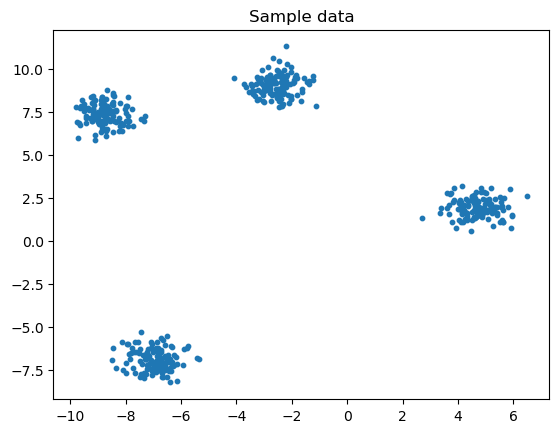

In [2]:
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.60,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Sample data')
plt.show()

## 2. Elbow Method

We compute the **inertia** (also called WCSS – within-cluster sum of squares)
for different values of K and plot it. We then visually inspect where the
curve starts to bend (the "elbow").

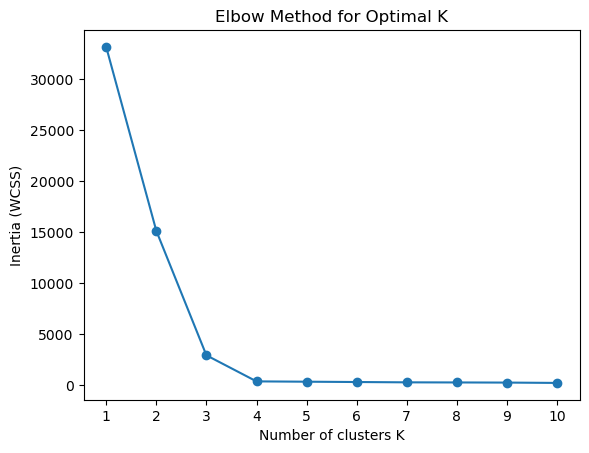

In [3]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(list(K_range), inertias, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(list(K_range))
plt.show()

## 3. Silhouette Score

Now we compute the **silhouette score** for different values of K.
Silhouette score ranges from -1 to 1; higher is better.

We only compute it for K ≥ 2, because silhouette is not defined for K = 1.

K = 2, Silhouette Score = 0.6187
K = 3, Silhouette Score = 0.8021
K = 4, Silhouette Score = 0.8757
K = 5, Silhouette Score = 0.7496
K = 6, Silhouette Score = 0.6040
K = 7, Silhouette Score = 0.4855
K = 8, Silhouette Score = 0.4783
K = 9, Silhouette Score = 0.4694
K = 10, Silhouette Score = 0.3293


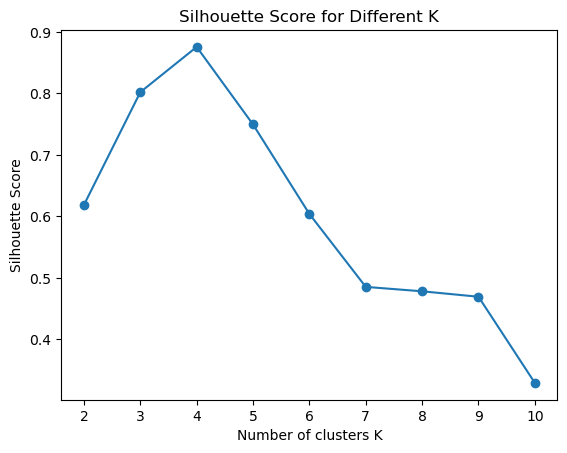

In [4]:
sil_scores = []
K_range_sil = range(2, 11)

for k in K_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f'K = {k}, Silhouette Score = {score:.4f}')

plt.plot(list(K_range_sil), sil_scores, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.xticks(list(K_range_sil))
plt.show()

## 4. Fit K-Means with the chosen K

After looking at the elbow plot and silhouette scores, pick a value for K
(for example, `best_k = 4` if that looks good), and then fit a final
K-Means model. Here we visualize the resulting clusters and their centers.

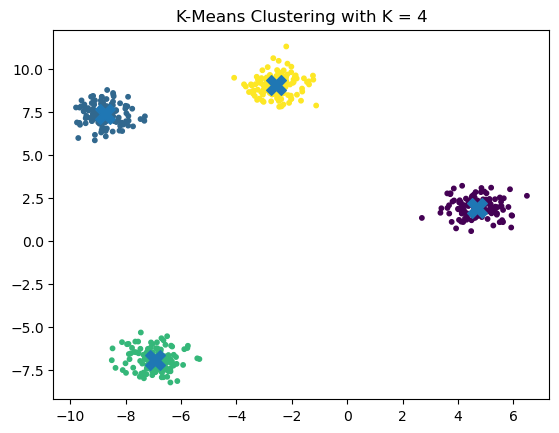

In [5]:
# Choose K after inspecting the previous plots/scores
best_k = 4  # you can change this based on your observations

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_final = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels_final, s=10)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X')
plt.title(f'K-Means Clustering with K = {best_k}')
plt.show()